Populating the interactive namespace from numpy and matplotlib


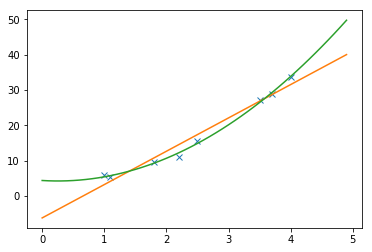

Standard diviation for the linear fit is:  2.244 
Standard diviation the the quadratic fit is:  0.813
The Quadratic fit is a better as it has the lower stadard diviation.


In [1]:
%pylab inline

#Question 3a

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#Have to fit a straight line and a quadratic to a set of given data points.


# Defineing a set of functions for creating the data points to be plotted.
#Linear function.
def lin (x,m,c):
    return m*x+c

#Quadratic function.
def quad (x,a,b,c):
    return a*x**2+b*x+c


#Given data set:
x = [1.0, 2.5, 3.5, 4.0, 1.1, 1.8, 2.2, 3.7]
y = [6.008, 15.722, 27.130, 33.772, 5.257, 9.549, 11.098, 28.828]


#Using Optimize to find the parameters of line we will fit to the data.
#For the linear function optimize should find two numbers.
#1st being the gradient (m) and 2nd being the constant (c).
lC,linCovarience = optimize.curve_fit(lin,x,y)

#For the quadratic function optimize should find three numbers.
#1st the coefficient of the x^2 terms (a); 2nd the coefficient of x terms (b) and 3rd the constant (c).
qC,quadCovarience = optimize.curve_fit(quad,x,y)

#NOTE:I need use two variables for optimize.curve_fit.
#Otherwise the covarience is included into the one variable andd an error occurs.


xrange = np.arange(0,5, 0.1)
#Using this range I inclue the original dataset of x while meaning that my fitted lines will be clear and smooth.


#Using the funtions defined above with the coefficients found using optimize.
ylin = lin(xrange,lC[0],lC[1])
yquad = quad(xrange,qC[0],qC[1],qC[2])

#Plotting the graph.
plt.plot(x, y, 'x',xrange,ylin,'-',xrange,yquad,'-')
plt.show()


#Which fit is better?
#By calculating the standard diviation I can say the line that has the smallest standard diviation provides the best fit.

#Calculate the standard diviation by using Least square method.
Slin=0
Squad=0
for i in range(len(y)):
    Slin  += ((y[i]-lin(x[i],lC[0],lC[1]))**2)
    Squad += (y[i]-quad(x[i],qC[0],qC[1],qC[2]))**2
              
SigmaLin=np.sqrt(Slin/(len(x)-len(lC)))
SigmaQuad=np.sqrt(Squad/(len(x)-len(qC)))

print('Standard diviation for the linear fit is: ',SigmaLin.round(3),'\nStandard diviation the the quadratic fit is: ',SigmaQuad.round(3))
if SigmaLin<SigmaQuad:
               print ('The linear fit is the better fit as it has a lower standard diviation.')
if SigmaLin>SigmaQuad:
               print('The Quadratic fit is a better as it has the lower stadard diviation.')
else:
               print('they are both equally good fits.')
               QuadDev = np.sqrt(Squad / (len(x)-1))

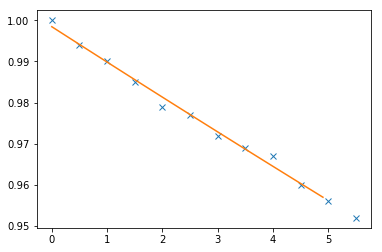

Standard diviation for the eponential fit is:  0.001 

The estimated Halflife of the substance is:  80.178379019 years.


In [2]:
#Question 3b

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

#Have to estimate the radioactive half-life of a substance. (Told that the data is "noisy" implies that need to find a fitted line.)


#Given data set
#NOTE: X is in Half Year intervals. 
x=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
y=[1.000,0.994,0.990,0.985,0.979,0.977,0.972,0.969,0.967,0.960,0.956,0.952]


# Defining the decay function.
def Decay (x,A,b):
    return A*np.exp(-b*x)


#Again like question 3a I use a new range for x when plotting so any lines fitted will be smooth.
xrange = np.arange(0,5, 0.1)


#Once more using optimize to find the coefficients of my function.
DecayAb, DecayCovarience=optimize.curve_fit(Decay,x,y)


#Plotting the graph.
yplot=Decay(xrange,DecayAb[0],DecayAb[1])
plt.plot(x, y, 'x',xrange,yplot,'-')
plt.show()
### add labels etc to both these questions


#As in question 3a I will calculate the standard diviation to gain an insight into the goodness of fit.
#Using least square method.
S=0
for i in range(len(x)):
    S+=(y[i]-Decay(x[i],DecayAb[0],DecayAb[1]))**2
    
SigmaDecay=np.sqrt(S/(len(x)-len(DecayAb)))

print('Standard diviation for the eponential fit is: ',SigmaDecay.round(3),'\n')

#Now to calculate halflife (Please see markdown below)
HL = np.log(2)/DecayAb[1]
print('The estimated Halflife of the substance is: ',HL, 'years.')

# Notes & Rearrangement of Equations
### Rearrangement of Exponential Equation:
We are given the exponential equation of decay:

$\gamma (t)=ae^{-bt}$
*Where $\gamma$ is the intesity of the radioactivity; $a$ and $b$ are constants found using optimise; $e$ is the exponential and $t$ is time (in years).*

$b$ is the decay constant of the substance and therefore I can say the halflife is:

$T=\frac{ln(2)}{b}$



### About the fit
The standard diviation of the fitted line is extreamy small and therefore I can say that the fit is good. As the standard diviation is related to the uncirtainty in the data it is curious that is is so small, as it is makes it clear in the question that the readings were taken with alot of background noise.